# Capstone Project 1

## Data Wrangling

### Importing dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium.plugins import HeatMap
import scipy.stats as stats
import researchpy as rp

In [2]:
# Importing Dataframes
healthcares=pd.read_csv('annuaire-des-professionnels-de-sante.csv',delimiter=';')
municipalities=pd.read_csv('code-postal-code-insee-2015.csv',delimiter=';')

In [3]:
print(healthcares.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149477 entries, 0 to 149476
Data columns (total 21 columns):
Civilité                                        149443 non-null object
Code Postal                                     149477 non-null int64
Commune                                         149477 non-null object
Téléphone                                       124193 non-null object
Code profession                                 149477 non-null int64
Mode d'exercice particulier                     3409 non-null object
Nature de l'exercice                            149477 non-null object
Convention du professionnel                     149477 non-null object
Sesam Vitale                                    149477 non-null object
Types d'actes techniques réalisés               109170 non-null object
Codes CCAM des actes techniques réalisés        109179 non-null object
Actes techniques réalisés                       109179 non-null object
Codes CCAM + Phase Actes techniques réali

In [4]:
print(municipalities.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39737 entries, 0 to 39736
Data columns (total 25 columns):
Geo Point               39724 non-null object
Geo Shape               39721 non-null object
ID_GEOFLA               39711 non-null object
CODE_COM                39711 non-null float64
INSEE_COM               39711 non-null object
NOM_COM                 39711 non-null object
STATUT                  39711 non-null object
X_CHF_LIEU              39711 non-null float64
Y_CHF_LIEU              39711 non-null float64
X_CENTROID              39711 non-null float64
Y_CENTROID              39711 non-null float64
Z_MOYEN                 39711 non-null float64
SUPERFICIE              39711 non-null float64
POPULATION              39701 non-null float64
CODE_CANT               39566 non-null float64
CODE_ARR                39688 non-null float64
CODE_DEPT               39711 non-null object
NOM_DEPT                39711 non-null object
CODE_REG                39711 non-null object
NOM_REG

In [5]:
healthcares.head()

,Civilité,Code Postal,Commune,Téléphone,Code profession,Mode d'exercice particulier,Nature de l'exercice,Convention du professionnel,Sesam Vitale,Types d'actes techniques réalisés,...,Actes techniques réalisés,Codes CCAM + Phase Actes techniques réalisés,Adresse,Nom du professionnel,Profession,Coordonnées,Code INSEE,EPCI,Département,Région
0,Femme,10300,STE SAVINE,03.25.79.90.92,18,NaN,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...",...,"Pose d'un plan de libération occlusale,Adjonct...","HBLD4520,HBBD0060,HBLD0380,HBFD0060,HBLD4180,H...",63 AVENUE GALLIENI 10300 STE SAVINE,VERONIQUE COMTE,Chirurgien-dentiste,"48.293903, 4.05555",10362,CA Troyes Champagne Métropole,AUBE,GRAND EST
1,Femme,42660,ST GENEST MALIFAUX,04.77.51.70.68,18,NaN,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...",...,"Pose d'un plan de libération occlusale,Exérèse...","HBLD0750,HBBD0060,HBMD0170,HBMD0200,HBLD0380,H...",18 RUE DU VELAY 42660 ST GENEST MALIFAUX,FRANCOISE CONDAMIN,Chirurgien-dentiste,"45.339643, 4.418339",42224,CC des Monts du Pilat,LOIRE,AUVERGNE-RHONE-ALPES
2,Femme,59830,CYSOING,03.20.79.54.07,18,NaN,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...",...,Restauration d'une dent d’un secteur incisivoc...,"HBLD1230,HBMD0200,HBLD0380,HBMD0530,HBMD0540,H...",83 RUE ROGER SALENGRO 59830 CYSOING,DENISE COPIN,Chirurgien-dentiste,"50.567909, 3.216851",59168,CC Pévèle-Carembault,NORD,HAUTS-DE-FRANCE
3,Femme,62190,LILLERS,07.71.83.09.91,18,NaN,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...",...,Restauration d'une dent d’un secteur incisivoc...,"HBMD0530,HBFD0030,HBGD0350,HBMD0500,HBMD0440,H...",CABINET DU DR COMPAGNON ZAC DE LA HAYE 120 RUE...,JULIE COMPAGNON,Chirurgien-dentiste,"50.56338, 2.466451",62516,"CA de Béthune-Bruay, Artois-Lys Romane",PAS-DE-CALAIS,HAUTS-DE-FRANCE
4,Femme,21450,VILLAINES EN DUESMOIS,03.80.89.04.44,45,NaN,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,Actes techniques médicaux (hors imagerie),...,Injection thérapeutique d'agent pharmacologiqu...,"JKHD0010,MZLB0010",3 ROUTE DE MONTBARD 21450 VILLAINES EN DUESMOIS,ELENA CORBEANU,Médecin généraliste,"47.679272, 4.524453",21685,CC du Pays Châtillonnais,COTE-D'OR,BOURGOGNE-FRANCHE-COMTE


In [6]:
municipalities.head()

,Geo Point,Geo Shape,ID_GEOFLA,CODE_COM,INSEE_COM,NOM_COM,STATUT,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,...,CODE_ARR,CODE_DEPT,NOM_DEPT,CODE_REG,NOM_REG,Ligne_5,Libelle_acheminement,Code_postal,Nom_commune,coordonnees_gps
0,"43.2213812599, -0.229479954692","{""type"": ""Polygon"", ""coordinates"": [[[-0.21425...",COMMUNE00000000000012233,119.0,64119,BEUSTE,Commune simple,437369.0,6240814.0,437816.0,...,3.0,64,PYRENEES-ATLANTIQUES,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,BEUSTE,64800,BEUSTE,"43.2213812599, -0.229479954692"
1,"45.3088178571, 0.812461373925","{""type"": ""Polygon"", ""coordinates"": [[[0.827398...",COMMUNE00000000000010957,239.0,24239,LIGUEUX,Commune simple,529105.0,6470098.0,528740.0,...,3.0,24,DORDOGNE,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,NaN,NaN,NaN,"45.3088178571, 0.812461373925"
2,"44.9958115913, 2.16384260373","{""type"": ""Polygon"", ""coordinates"": [[[2.169220...",COMMUNE00000000000010998,135.0,15135,MONTVERT,Commune simple,633833.0,6433252.0,634558.0,...,1.0,15,CANTAL,84,AUVERGNE-RHONE-ALPES,NaN,MONTVERT,15150,MONTVERT,"44.9958115913, 2.16384260373"
3,"42.995424347, 2.16142100485","{""type"": ""Polygon"", ""coordinates"": [[[2.150276...",COMMUNE00000000000011061,45.0,11045,BOURIEGE,Commune simple,631944.0,6209982.0,631924.0,...,2.0,11,AUDE,76,LANGUEDOC-ROUSSILLON-MIDI-PYRENEES,NaN,BOURIEGE,11300,BOURIEGE,"42.995424347, 2.16142100485"
4,"48.6279115585, 6.49593570879","{""type"": ""Polygon"", ""coordinates"": [[[6.475699...",COMMUNE00000000000011047,83.0,54083,BONVILLER,Commune simple,957623.0,6842744.0,957546.0,...,2.0,54,MEURTHE-ET-MOSELLE,44,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,NaN,BONVILLER,54300,BONVILLER,"48.6279115585, 6.49593570879"


### Complementary datasets

In [7]:
poverty=pd.read_csv('Taux_de_pauvrete_zipcode.csv',delimiter=';',header=None)
poverty=poverty.iloc[:,:2]
poverty.columns=['zipcode','poverty_rate']
poverty.head()

,zipcode,poverty_rate
0,1004,0.20
1,1014,0.17
2,1025,0.19
3,1031,0.19
4,1032,0.14


In [8]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4356 entries, 0 to 4355
Data columns (total 2 columns):
zipcode         4356 non-null object
poverty_rate    4356 non-null float64
dtypes: float64(1), object(1)
memory usage: 68.1+ KB


In [9]:
unemployment=pd.read_excel('Taux_de_chomage_dpt.xlsx',encoding='utf-8',header=None)
unemployment.columns=['Department_name','unemployment_rate']
unemployment.head()

,Department_name,unemployment_rate
0,AIN,6.2
1,AISNE,12.0
2,ALLIER,9.3
3,ALPES-DE-HAUTE-PROVENCE,10.6
4,HAUTES-ALPES,8.3


In [10]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
Department_name      96 non-null object
unemployment_rate    96 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [11]:
# Preparing poverty_reg dataset
region=municipalities[['NOM_REG','Code_postal']]
# Merge with region
poverty_region=region.merge(poverty,left_on=['Code_postal'],right_on=['zipcode'],how='left')
poverty_region=poverty_region.drop(['zipcode','Code_postal'],axis=1)
# Groupby region
poverty_reg=poverty_region.groupby(['NOM_REG'])[['poverty_rate']].mean()
poverty_reg=poverty_reg.fillna(poverty_reg.mean())
poverty_reg=poverty_reg.reset_index()
poverty_reg.head()

,NOM_REG,poverty_rate
0,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,0.195855
1,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,0.190482
2,AUVERGNE-RHONE-ALPES,0.199540
3,BOURGOGNE-FRANCHE-COMTE,0.171667
4,BRETAGNE,0.167500


In [12]:
# Preparing unemployment_reg dataset
Region=municipalities[['NOM_REG','NOM_DEPT']]
# Merge with region
unemployment_region=Region.merge(unemployment,left_on=['NOM_DEPT'],right_on=['Department_name'],how='left')
unemployment_region=unemployment_region.drop(['NOM_DEPT','Department_name'],axis=1)
# Groupby region
unemployment_reg=unemployment_region.groupby(['NOM_REG'])[['unemployment_rate']].mean()
unemployment_reg=unemployment_reg.fillna(unemployment_reg.mean())
unemployment_reg=unemployment_reg.reset_index()
unemployment_reg.head()

,NOM_REG,unemployment_rate
0,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,8.500612
1,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,8.431282
2,AUVERGNE-RHONE-ALPES,6.955504
3,BOURGOGNE-FRANCHE-COMTE,7.295328
4,BRETAGNE,6.962888


In [13]:
# Merging with municipalities
municipalities=municipalities.merge(poverty_reg)
municipalities=municipalities.merge(unemployment_reg)
municipalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39704 entries, 0 to 39703
Data columns (total 27 columns):
Geo Point               39704 non-null object
Geo Shape               39704 non-null object
ID_GEOFLA               39704 non-null object
CODE_COM                39704 non-null float64
INSEE_COM               39704 non-null object
NOM_COM                 39704 non-null object
STATUT                  39704 non-null object
X_CHF_LIEU              39704 non-null float64
Y_CHF_LIEU              39704 non-null float64
X_CENTROID              39704 non-null float64
Y_CENTROID              39704 non-null float64
Z_MOYEN                 39704 non-null float64
SUPERFICIE              39704 non-null float64
POPULATION              39701 non-null float64
CODE_CANT               39559 non-null float64
CODE_ARR                39681 non-null float64
CODE_DEPT               39704 non-null object
NOM_DEPT                39704 non-null object
CODE_REG                39704 non-null object
NOM_REG

In [14]:
municipalities

,Geo Point,Geo Shape,ID_GEOFLA,CODE_COM,INSEE_COM,NOM_COM,STATUT,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,...,NOM_DEPT,CODE_REG,NOM_REG,Ligne_5,Libelle_acheminement,Code_postal,Nom_commune,coordonnees_gps,poverty_rate,unemployment_rate
0,"43.2213812599, -0.229479954692","{""type"": ""Polygon"", ""coordinates"": [[[-0.21425...",COMMUNE00000000000012233,119.0,64119,BEUSTE,Commune simple,437369.0,6240814.0,437816.0,...,PYRENEES-ATLANTIQUES,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,BEUSTE,64800,BEUSTE,"43.2213812599, -0.229479954692",0.190482,8.431282
1,"45.3088178571, 0.812461373925","{""type"": ""Polygon"", ""coordinates"": [[[0.827398...",COMMUNE00000000000010957,239.0,24239,LIGUEUX,Commune simple,529105.0,6470098.0,528740.0,...,DORDOGNE,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,NaN,NaN,NaN,"45.3088178571, 0.812461373925",0.190482,8.431282
2,"44.4322363944, -0.276759124574","{""type"": ""Polygon"", ""coordinates"": [[[-0.29580...",COMMUNE00000000000011210,244.0,33244,LIGNAN-DE-BAZAS,Commune simple,439097.0,6375661.0,439575.0,...,GIRONDE,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,LIGNAN DE BAZAS,33430,LIGNAN DE BAZAS,"44.4322363944, -0.276759124574",0.190482,8.431282
3,"44.6158101482, 0.53128181934","{""type"": ""Polygon"", ""coordinates"": [[[0.515516...",COMMUNE00000000000012466,299.0,47299,SERIGNAC-PEBOUDOU,Commune simple,504858.0,6393657.0,504450.0,...,LOT-ET-GARONNE,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,SERIGNAC PEBOUDOU,47410,SERIGNAC PEBOUDOU,"44.6158101482, 0.53128181934",0.190482,8.431282
4,"44.646484121, -0.359021813744","{""type"": ""Polygon"", ""coordinates"": [[[-0.36089...",COMMUNE00000000000012575,327.0,33327,PODENSAC,Commune simple,434030.0,6400325.0,433860.0,...,GIRONDE,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,PODENSAC,33720,PODENSAC,"44.646484121, -0.359021813744",0.190482,8.431282
5,"44.840820295, 0.218088631818","{""type"": ""Polygon"", ""coordinates"": [[[0.209734...",COMMUNE00000000000010087,402.0,33402,SAINTE-FOY-LA-GRANDE,Commune simple,480145.0,6419593.0,480192.0,...,GIRONDE,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,STE FOY LA GRANDE,33220,STE FOY LA GRANDE,"44.840820295, 0.218088631818",0.190482,8.431282
6,"44.137571992, 0.568058237559","{""type"": ""Polygon"", ""coordinates"": [[[0.553733...",COMMUNE00000000000010133,16.0,47016,AUBIAC,Commune simple,504884.0,6341041.0,505538.0,...,LOT-ET-GARONNE,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,AUBIAC,47310,AUBIAC,"44.137571992, 0.568058237559",0.190482,8.431282
7,"46.5835248412, 0.839961287115","{""type"": ""Polygon"", ""coordinates"": [[[0.865873...",COMMUNE00000000000010482,246.0,86246,SAINT-SAVIN,Commune simple,536384.0,6609559.0,535367.0,...,VIENNE,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,ST SAVIN,86310,ST SAVIN,"46.5835248412, 0.839961287115",0.190482,8.431282
8,"45.7558139115, -0.491433829558","{""type"": ""Polygon"", ""coordinates"": [[[-0.51236...",COMMUNE00000000000010690,314.0,17314,SAINT-CESAIRE,Commune simple,427517.0,6523107.0,428880.0,...,CHARENTE-MARITIME,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,ST CESAIRE,17770,ST CESAIRE,"45.7558139115, -0.491433829558",0.190482,8.431282
9,"46.7142856927, -0.556959453889","{""type"": ""Polygon"", ""coordinates"": [[[-0.55897...",COMMUNE00000000000027334,51.0,79051,LE BREUIL-BERNARD,Commune simple,428687.0,6630443.0,428476.0,...,DEUX-SEVRES,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,LE BREUIL BERNARD,79320,LE BREUIL BERNARD,"46.7142856927, -0.556959453889",0.190482,8.431282


### Data Cleaning

In [15]:
# Removing the column in the healthcares dataframe with too many NaN Values 
healthcares=healthcares.dropna(thresh=100000,axis='columns')
# Removing the column in the healthcares dataframe with too many NaN Values 
municipalities=municipalities.dropna(thresh=5000,axis='columns')

In [16]:
# Filtering both dataframes by removing the NaN Values from the 'Code Postal' & 'Code_postal' columns
Healthcares=healthcares[healthcares['Code Postal'].notnull()]
Municipalities=municipalities[municipalities['Code_postal'].notnull()]

In [17]:
# Removing the overseas department 
Municipalities=Municipalities[(Municipalities['NOM_REG']!='REUNION')&(Municipalities['NOM_REG']!='MARTINIQUE')&
                             (Municipalities['NOM_REG']!='MAYOTTE')&(Municipalities['NOM_REG']!='GUADELOUPE')&
                             (Municipalities['NOM_REG']!='GUYANE')]
Healthcares=Healthcares[(Healthcares['Région']!='LA REUNION')&(Healthcares['Région']!='MARTINIQUE')&
                       (Healthcares['Région']!='MAYOTTE')&(Healthcares['Région']!='GUADELOUPE')&
                       (Healthcares['Région']!='GUYANE')]

In [18]:
# dtype values of the 'Code_postal' column
Zip_code=Municipalities['Code_postal']
Zip_code.dtype

dtype('O')

In [19]:
# Find the str values in the 'Code_postal' column 
sorted(Zip_code,reverse=True)[:15]

['ROURA',
 'REGINA',
 'MANA',
 '9800',
 '9800',
 '9800',
 '9800',
 '9800',
 '9800',
 '9800',
 '9800',
 '9800',
 '9800',
 '9800',
 '9800']

In [20]:
# Removing the str values in the 'Code_postal' column and converting them in integer values
Municipalities=Municipalities[(Municipalities['Code_postal']!='ST LAURENT DU MARONI')&
                              (Municipalities['Code_postal']!='ST ELIE')&(Municipalities['Code_postal']!='ROURA')&
                              (Municipalities['Code_postal']!='REGINA')&(Municipalities['Code_postal']!='MARIPASOULA')&
                              (Municipalities['Code_postal']!='MANA')&(Municipalities['Code_postal']!='CAMOPI')]
Municipalities['Code_postal']=Municipalities['Code_postal'].astype(int)

In [21]:
# Changing some incorrect name in Municipalities 
Municipalities.NOM_REG[Municipalities.NOM_REG=='LANGUEDOC-ROUSSILLON-MIDI-PYRENEES']='OCCITANIE'
Municipalities.NOM_REG[Municipalities.NOM_REG=='AQUITAINE-LIMOUSIN-POITOU-CHARENTES']='NOUVELLE-AQUITAINE'
Municipalities.NOM_REG[Municipalities.NOM_REG=='ALSACE-CHAMPAGNE-ARDENNE-LORRAINE']='GRAND EST'
Municipalities.NOM_REG[Municipalities.NOM_REG=='NORD-PAS-DE-CALAIS-PICARDIE']='HAUTS-DE-FRANCE'

C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Diane\Anaconda3\lib\

### Creating new columns in Municipalities

#### North / South 

In [22]:
# Creating a new column cutting France in two parts : North and South 
Municipalities['North_South']=''
Municipalities.North_South[(Municipalities.NOM_REG=='AUVERGNE-RHONE-ALPES')|
                           (Municipalities.NOM_REG=='CORSE')|
                          (Municipalities.NOM_REG=='OCCITANIE')|
                          (Municipalities.NOM_REG=='NOUVELLE-AQUITAINE')|
                          (Municipalities.NOM_REG=="PROVENCE-ALPES-COTE D'AZUR")]='South'
Municipalities.North_South[(Municipalities.NOM_REG!='AUVERGNE-RHONE-ALPES')&
                           (Municipalities.NOM_REG!='CORSE')&
                          (Municipalities.NOM_REG!='OCCITANIE')&
                          (Municipalities.NOM_REG!='NOUVELLE-AQUITAINE')&
                          (Municipalities.NOM_REG!="PROVENCE-ALPES-COTE D'AZUR")]='North'

C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


#### Population and surface area by zipcode

In [23]:
# Groupby population and zip code
Groupby_zipcode=Municipalities.groupby('Code_postal')[['POPULATION','SUPERFICIE']].sum()
Groupby_zipcode.columns=['Population_Zipcode','SurfaceArea_Zipcode']

In [24]:
# Merging 'Population_Zipcode' with Municipalities
Municipalities=pd.merge(Municipalities,Groupby_zipcode,left_on=['Code_postal'],right_on=['Code_postal'],how='left')

#### Longitude & Latitude

In [25]:
# Separating Latitude & Longitude 
Lat=[]
Lon=[]
Geo=np.array(Municipalities['Geo Point'])
for i in Geo:
    for index,j in enumerate (i):
        if j== ',':
            a=i[:index]
            b=i[index+1:]
    Lat.append(float(a))
    Lon.append(float(b))
Municipalities['Latitude']=Lat
Municipalities['Longitude']=Lon

### Merging both dataframes with Zip Code columns

In [26]:
# Merging both dataframes through ['Code Postal'] & ['Code_postal'] column
data_merge=pd.merge(Healthcares,Municipalities,left_on=['Code Postal'],right_on=['Code_postal'],how='left')

In [27]:
# Deleting duplicate rows and rows with null data in the right part of the dataframe
data_merge=data_merge[data_merge.INSEE_COM.notnull()]
data_merge=data_merge.drop_duplicates(['Nom du professionnel'])

In [28]:
data_merge.head(10)

,Civilité,Code Postal,Commune,Téléphone,Code profession,Nature de l'exercice,Convention du professionnel,Sesam Vitale,Types d'actes techniques réalisés,Codes CCAM des actes techniques réalisés,...,Code_postal,Nom_commune,coordonnees_gps,poverty_rate,unemployment_rate,North_South,Population_Zipcode,SurfaceArea_Zipcode,Latitude,Longitude
0,Femme,10300,STE SAVINE,03.25.79.90.92,18,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...","HBLD418,HBLD452,HBMD047,HBLD131,HBQK191,HBFD02...",...,10300.0,MACEY,"48.3058173125, 3.91397104907",0.195855,8.500612,North,12340.0,6039.0,48.305817,3.913971
4,Femme,42660,ST GENEST MALIFAUX,04.77.51.70.68,18,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...","HBLD418,HBFD024,HBGD043,HBMD054,HBMD049,HBGD03...",...,42660.0,TARENTAISE,"45.3614411312, 4.49208822359",0.199540,6.955504,South,8681.0,16034.0,45.361441,4.492088
12,Femme,59830,CYSOING,03.20.79.54.07,18,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...","HBMD058,HBMD047,HBFD024,HBGD043,HBMD054,HBMD04...",...,59830.0,BOURGHELLES,"50.5638806886, 3.24666389869",0.181618,10.661377,North,11203.0,3847.0,50.563881,3.246664
19,Femme,62190,LILLERS,07.71.83.09.91,18,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...","HBMD047,HBQK191,HBGD043,HBBD005,HBMD049,HBGD03...",...,62190.0,AUCHY AU BOIS,"50.5508313076, 2.37420575529",0.181618,10.661377,North,14000.0,5106.0,50.550831,2.374206
27,Femme,21450,VILLAINES EN DUESMOIS,03.80.89.04.44,45,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,Actes techniques médicaux (hors imagerie),"MZLB001,JKHD001",...,21450.0,JOURS LES BAIGNEUX,"47.6251748085, 4.60397343724",0.171667,7.295328,North,1578.0,22315.0,47.625175,4.603973
42,Femme,33240,ST ANDRE DE CUBZAC,05.57.43.61.49,71,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de chirurgie,Actes techniques médicaux (...","JKHD001,QZGA002,JKKD001",...,33240.0,VIRSAC,"45.02587074, -0.435563206716",0.190482,8.431282,South,32718.0,16053.0,45.025871,-0.435563
63,Femme,39110,SALINS LES BAINS,03.84.73.28.23,45,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,Actes techniques médicaux (hors imagerie),"DEQP003,JKHD001",...,39110.0,CHILLY SUR SALINS,"46.870060882, 5.85823699869",0.171667,7.295328,North,7001.0,22933.0,46.870061,5.858237
89,Femme,35200,RENNES,NaN,71,Libéral activité salariée,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de chirurgie,Actes techniques médicaux (...","QZLA004,JKHD001,QZGA002,JKLD001",...,35200.0,RENNES,"48.111571436, -1.68168588816",0.167500,6.962888,North,209860.0,5036.0,48.111571,-1.681686
90,Femme,9600,LAROQUE D OLMES,05.61.64.04.58,23,Libéral intégral,"Secteur 2, Signature du contrat d'accès aux soins",Lecteur de carte Sesam Vitale,NaN,NaN,...,9600.0,ESCLAGNE,"42.9812118767, 1.84379320411",0.188050,9.038098,South,8166.0,26124.0,42.981212,1.843793
106,Femme,95350,ST BRICE SOUS FORET,01.39.94.42.32,45,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,NaN,NaN,...,95350.0,PISCOP,"49.0165466205, 2.34156318316",0.213946,7.312780,North,15069.0,1012.0,49.016547,2.341563


In [29]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 643127
Data columns (total 51 columns):
Civilité                                        123686 non-null object
Code Postal                                     123710 non-null int64
Commune                                         123710 non-null object
Téléphone                                       106379 non-null object
Code profession                                 123710 non-null int64
Nature de l'exercice                            123710 non-null object
Convention du professionnel                     123710 non-null object
Sesam Vitale                                    123710 non-null object
Types d'actes techniques réalisés               87382 non-null object
Codes CCAM des actes techniques réalisés        87388 non-null object
Actes techniques réalisés                       87388 non-null object
Codes CCAM + Phase Actes techniques réalisés    87388 non-null object
Adresse                                    

## Data Storytelling

### Creating new datasets

In [30]:
# Population and Doctors by Region
# Groupby the number of doctors by region
Doctors_number_by_region=Healthcares.groupby('Région')[['Code profession']].count()
Doctors_number_by_region.columns=['Doctors_number']
# Groupby the population by region
Population_by_region=Municipalities.groupby('NOM_REG')[['POPULATION']].sum()
Population_by_region.columns=['Population']
# Merge both datasets
Population_Doctors_by_region=Doctors_number_by_region.join(Population_by_region)
Population_Doctors_by_region=Population_Doctors_by_region.sort_values('Doctors_number')
# New column North / South
Population_Doctors_by_region['North_South']=''
Population_Doctors_by_region.North_South[(Population_Doctors_by_region.index=='AUVERGNE-RHONE-ALPES')|
                           (Population_Doctors_by_region.index=='CORSE')|
                          (Population_Doctors_by_region.index=='OCCITANIE')|
                          (Population_Doctors_by_region.index=='NOUVELLE-AQUITAINE')|
                          (Population_Doctors_by_region.index=="PROVENCE-ALPES-COTE D'AZUR")]='South'
Population_Doctors_by_region.North_South[(Population_Doctors_by_region.index!='AUVERGNE-RHONE-ALPES')&
                           (Population_Doctors_by_region.index!='CORSE')&
                          (Population_Doctors_by_region.index!='OCCITANIE')&
                          (Population_Doctors_by_region.index!='NOUVELLE-AQUITAINE')&
                          (Population_Doctors_by_region.index!="PROVENCE-ALPES-COTE D'AZUR")]='North'
Population_Doctors_by_region.head()

C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Doctors_number,Population,North_South
Région,,,
CORSE,768,627661.0,South
CENTRE-VAL DE LOIRE,4244,3214710.0,North
BOURGOGNE-FRANCHE-COMTE,4887,3389287.0,North
NORMANDIE,5360,5085101.0,North
BRETAGNE,6032,4305528.0,North


In [31]:
# Type of Doctors by Zip Code
# Groupby type of healthcares professional by region
Doctors_type_region=Healthcares.groupby(['Région','Profession'])[['Code profession']].count()
Doctors_type_region=Doctors_type_region.unstack('Profession')
print(Doctors_type_region.describe().iloc[1,:].sort_values(ascending=False).head())

# Merge with Population_Doctors_by_region to keep the same index order
Population_Doctors_by_region_2=Doctors_number_by_region.join(Doctors_type_region)
Population_Doctors_by_region_2=Population_Doctors_by_region_2.sort_values('Doctors_number')
Population_Doctors_by_region_2.head()

                 Profession         
Code profession  Médecin généraliste    3767.923077
                 Chirurgien-dentiste    2116.384615
                 Radiologue              757.615385
                 Psychiatre              393.538462
                 Ophtalmologiste         329.769231
Name: mean, dtype: float64


C:\Users\Diane\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Doctors_number,"(Code profession, Anesthésiste réanimateur)","(Code profession, Cancérologue radiothérapeute)","(Code profession, Cancérologue médical)","(Code profession, Cardiologue)","(Code profession, Chirurgien général)","(Code profession, Chirurgien infantile)","(Code profession, Chirurgien maxillo-facial)","(Code profession, Chirurgien maxillo-facial et stomatologiste)","(Code profession, Chirurgien orthopédiste et traumatologue)",...,"(Code profession, Psychiatre de l'enfant et de l'adolescent)","(Code profession, Pédiatre)","(Code profession, Radiologue)","(Code profession, Radiothérapeute)","(Code profession, Rhumatologue)","(Code profession, Réanimateur médical)","(Code profession, Sage-femme)","(Code profession, Spécialiste en médecine interne)","(Code profession, Spécialiste en médecine physique et de réadaptation)","(Code profession, Stomatologiste)"
Région,,,,,,,,,,,,,,,,,,,,,
CORSE,768,17.0,NaN,2.0,25.0,3.0,NaN,NaN,3.0,10.0,...,NaN,13.0,66.0,NaN,6.0,NaN,9.0,1.0,4.0,1.0
CENTRE-VAL DE LOIRE,4244,102.0,3.0,6.0,135.0,31.0,NaN,NaN,7.0,71.0,...,4.0,64.0,262.0,NaN,44.0,NaN,123.0,6.0,5.0,16.0
BOURGOGNE-FRANCHE-COMTE,4887,101.0,3.0,8.0,124.0,18.0,3.0,2.0,3.0,86.0,...,1.0,67.0,411.0,NaN,33.0,NaN,124.0,2.0,9.0,15.0
NORMANDIE,5360,94.0,6.0,5.0,149.0,35.0,7.0,2.0,17.0,88.0,...,4.0,66.0,596.0,NaN,52.0,NaN,129.0,4.0,6.0,22.0
BRETAGNE,6032,97.0,4.0,8.0,134.0,20.0,1.0,1.0,4.0,68.0,...,8.0,75.0,375.0,1.0,62.0,NaN,198.0,1.0,9.0,4.0


In [32]:
# Population and Doctors by Zip Code
# Dataframe doctors number by zip code
Population_Doctors_by_zipcode=data_merge.groupby(['Code Postal','Latitude','Longitude','Population_Zipcode',
                                                  'North_South','NOM_REG'])[['Code profession']].count()
Population_Doctors_by_zipcode.columns=['Doctors_number']
Population_Doctors_by_zipcode=Population_Doctors_by_zipcode.reset_index()
Population_Doctors_by_zipcode=Population_Doctors_by_zipcode.set_index('Code Postal')
Population_Doctors_by_zipcode['Ratio_Doctors_Population']=Population_Doctors_by_zipcode.Doctors_number/Population_Doctors_by_zipcode.Population_Zipcode
Population_Doctors_by_zipcode.head()

,Latitude,Longitude,Population_Zipcode,North_South,NOM_REG,Doctors_number,Ratio_Doctors_Population
Code Postal,,,,,,,
1000,46.211401,5.184308,85846.0,South,AUVERGNE-RHONE-ALPES,168,0.001957
1090,46.073448,4.812098,11799.0,South,AUVERGNE-RHONE-ALPES,5,0.000424
1100,46.238440,5.635638,78444.0,South,AUVERGNE-RHONE-ALPES,43,0.000548
1110,46.019540,5.599769,7082.0,South,AUVERGNE-RHONE-ALPES,10,0.001412
1120,45.822087,5.059683,32233.0,South,AUVERGNE-RHONE-ALPES,17,0.000527


### Doctors number and Population by Region

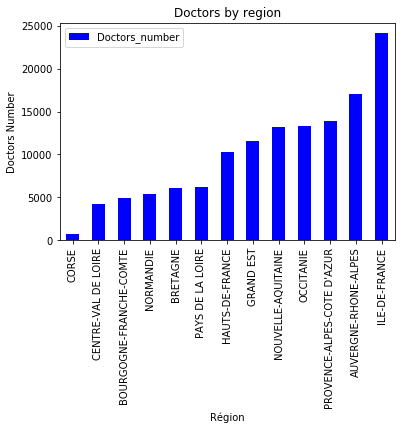

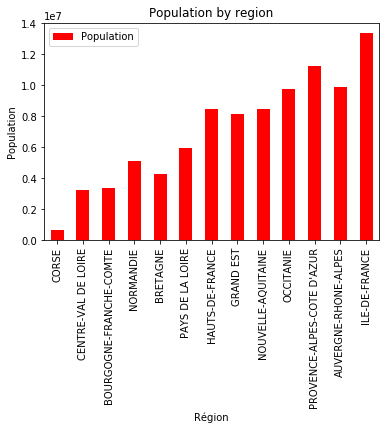

In [33]:
Population_Doctors_by_region.plot(y='Doctors_number',kind='bar',color='b')
plt.title('Doctors by region')
plt.ylabel('Doctors Number')
plt.show()
Population_Doctors_by_region.plot(y='Population',kind='bar',color='r')
plt.title('Population by region')
plt.ylabel('Population')
plt.show()

### Doctors number and Population by North and South of the France

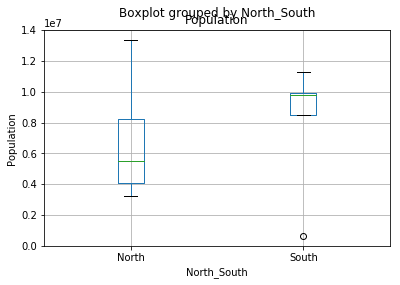

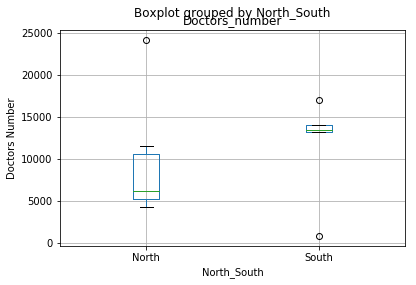

In [34]:
Population_Doctors_by_region.boxplot(by='North_South',column='Population')
plt.ylabel('Population')
plt.show()
Population_Doctors_by_region.boxplot(by='North_South',column='Doctors_number')
plt.ylabel('Doctors Number')
plt.show()

### Healthcares professional type by region

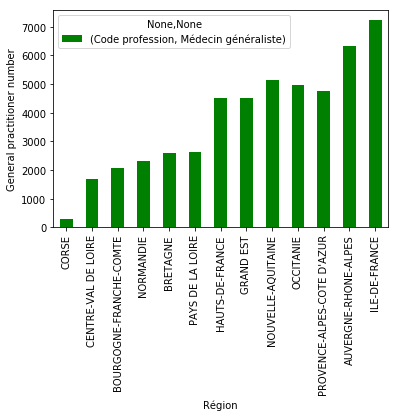

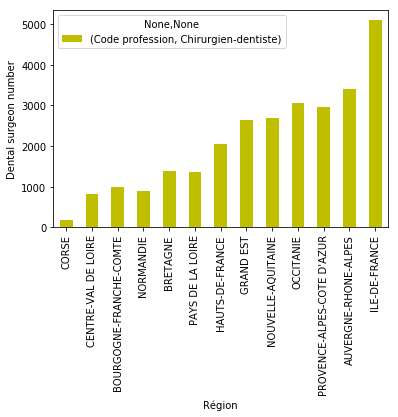

In [35]:
Population_Doctors_by_region_2.plot(y=('Code profession', 'Médecin généraliste'),kind='bar',color='g')
plt.ylabel('General practitioner number')
plt.show()
Population_Doctors_by_region_2.plot(y=('Code profession', 'Chirurgien-dentiste'),kind='bar',color='y')
plt.ylabel('Dental surgeon number')
plt.show()

### Doctors number Heatmap

In [36]:
# France Map
France_map=folium.Map(location=[46.63728, 2.3382623],zoom_start = 6)

Lat_Lon_Val = Population_Doctors_by_zipcode[['Latitude', 'Longitude','Doctors_number']]
Lat_Lon_Val = Lat_Lon_Val.dropna(axis=0, subset=['Latitude','Longitude','Doctors_number'])

# List comprehension to make out list of lists
Data = [[row['Latitude'],row['Longitude'],row['Doctors_number']] for index, row in Lat_Lon_Val.iterrows()]

Max_amount = float(Population_Doctors_by_zipcode['Doctors_number'].max())

# Plot it on the map
HeatMap(Data,radius=17, max_val=Max_amount, max_zoom=1).add_to(France_map)

# Markers Cities
folium.Marker([45.764043, 4.835659], popup='Lyon').add_to(France_map)
folium.Marker([48.8534, 2.3488], popup='Paris').add_to(France_map)
folium.Marker([43.296482, 5.36978], popup='Marseille').add_to(France_map)
folium.Marker([43.604652, 1.444209], popup='Toulouse').add_to(France_map)
folium.Marker([44.837789, -0.57918], popup='Bordeaux').add_to(France_map)
folium.Marker([47.218371, -1.553621], popup='Nantes').add_to(France_map)
folium.Marker([48.5734053, 7.7521113], popup='Strasbourg').add_to(France_map)
folium.Marker([43.7101728, 7.2619532], popup='Nice').add_to(France_map)
folium.Marker([43.610769, 3.876716], popup='Montpellier').add_to(France_map)
folium.Marker([50.633333, 3.066667], popup='Lille').add_to(France_map)
    
# Display the map
France_map.save('Doctors.html')

### Population Heatmap

In [37]:
France_Map=folium.Map(location=[46.63728, 2.3382623],zoom_start = 6)

Lat_Lon = data_merge[['Latitude', 'Longitude','POPULATION']]
Lat_Lon = Lat_Lon.dropna(axis=0, subset=['Latitude','Longitude','POPULATION'])

# List comprehension to make out list of lists
data = [[row['Latitude'],row['Longitude'],row['POPULATION']] for index, row in Lat_Lon.iterrows()]

max_amount = float(data_merge['POPULATION'].max())

# Plot it on the map
HeatMap(data,radius=14, max_val=max_amount, max_zoom=1).add_to(France_Map)

# Markers Cities
folium.Marker([45.764043, 4.835659], popup='Lyon').add_to(France_Map)
folium.Marker([48.8534, 2.3488], popup='Paris').add_to(France_Map)
folium.Marker([43.296482, 5.36978], popup='Marseille').add_to(France_Map)
folium.Marker([43.604652, 1.444209], popup='Toulouse').add_to(France_Map)
folium.Marker([44.837789, -0.57918], popup='Bordeaux').add_to(France_Map)
folium.Marker([47.218371, -1.553621], popup='Nantes').add_to(France_Map)
folium.Marker([48.5734053, 7.7521113], popup='Strasbourg').add_to(France_Map)
folium.Marker([43.7101728, 7.2619532], popup='Nice').add_to(France_Map)
folium.Marker([43.610769, 3.876716], popup='Montpellier').add_to(France_Map)
folium.Marker([50.633333, 3.066667], popup='Lille').add_to(France_Map)

# Display the map
France_Map.save('Population.html')

### Ratio Doctors / Population Heatmap

In [38]:
france_map=folium.Map(location=[46.63728, 2.3382623],zoom_start = 6)

lat_lon = Population_Doctors_by_zipcode[['Latitude', 'Longitude','Ratio_Doctors_Population']]
lat_lon = lat_lon.dropna(axis=0, subset=['Latitude','Longitude','Ratio_Doctors_Population'])

# List comprehension to make out list of lists
data_ = [[row['Latitude'],row['Longitude'],row['Ratio_Doctors_Population']] for index, row in lat_lon.iterrows()]

maxamount = float(Population_Doctors_by_zipcode['Ratio_Doctors_Population'].max())

# Plot it on the map
HeatMap(data,radius=10, max_val=maxamount, max_zoom=1).add_to(france_map)

# Markers Cities
folium.Marker([45.764043, 4.835659], popup='Lyon').add_to(france_map)
folium.Marker([48.8534, 2.3488], popup='Paris').add_to(france_map)
folium.Marker([43.296482, 5.36978], popup='Marseille').add_to(france_map)
folium.Marker([43.604652, 1.444209], popup='Toulouse').add_to(france_map)
folium.Marker([44.837789, -0.57918], popup='Bordeaux').add_to(france_map)
folium.Marker([47.218371, -1.553621], popup='Nantes').add_to(france_map)
folium.Marker([48.5734053, 7.7521113], popup='Strasbourg').add_to(france_map)
folium.Marker([43.7101728, 7.2619532], popup='Nice').add_to(france_map)
folium.Marker([43.610769, 3.876716], popup='Montpellier').add_to(france_map)
folium.Marker([50.633333, 3.066667], popup='Lille').add_to(france_map)

# Display the map
france_map.save('Ratio.html')

### Scatter plot Population / Doctors number

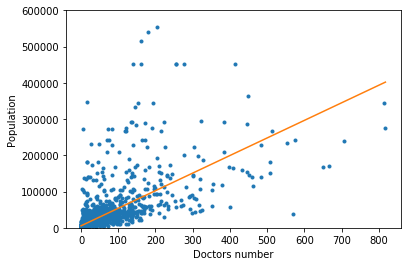

In [39]:
X=Population_Doctors_by_zipcode.Doctors_number
Y=Population_Doctors_by_zipcode.Population_Zipcode

# Linear Regression Line
slope,intercept=np.polyfit(X,Y,1)
x=np.array([0,max(X)])
y=slope*x+intercept

# Plot
_=plt.plot(X,Y,marker='.',linestyle='none')
_=plt.plot(x,y)
_=plt.ylim(0,600000)
_=plt.xlabel('Doctors number')
_=plt.ylabel('Population')
plt.show()

## Exploratory Data Analysis

### ANOVA between the ratio number of doctors / population on the North and the ratio on the South

In [40]:
import scipy.stats as stats
import researchpy as rp
df=Population_Doctors_by_zipcode[['Ratio_Doctors_Population','North_South']]

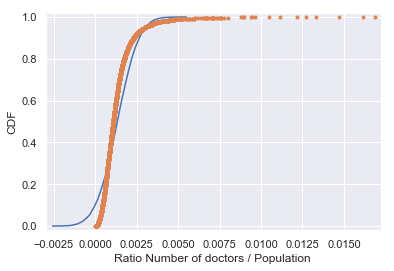

In [41]:
mean=np.mean(df.Ratio_Doctors_Population)
std=np.std(df.Ratio_Doctors_Population)
samples=np.random.normal(mean,std,size=10000)

# Cumulative Distribution Fonction plot
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

x,y=ecdf(df.Ratio_Doctors_Population)
x_theor,y_theor=ecdf(samples)

sns.set()
_=plt.plot(x_theor,y_theor)
_=plt.plot(x,y,marker='.',linestyle='none')
plt.margins(0.02)
_=plt.xlabel('Ratio Number of doctors / Population ')
_=plt.ylabel('CDF')
plt.show()

According to the CDF plot, the data seem normally distributed and may be a representation of the general population. 

In [42]:
rp.summary_cont(df['Ratio_Doctors_Population'].groupby(df['North_South']))

,N,Mean,SD,SE,95% Conf.,Interval
North_South,,,,,,
North,3226,0.001215,0.001010,0.000018,0.001180,0.001250
South,2366,0.001457,0.001092,0.000022,0.001413,0.001501


In [43]:
stats.f_oneway(df['Ratio_Doctors_Population'][df['North_South'] == 'North'], 
             df['Ratio_Doctors_Population'][df['North_South'] == 'South'])

F_onewayResult(statistic=72.71841523550022, pvalue=1.9026075894778537e-17)

### ANOVA between the ratios number of doctors / population depending on the location (Régions)

In [44]:
df2=Population_Doctors_by_zipcode[['Ratio_Doctors_Population','NOM_REG']]
df2.head()
df2.NOM_REG.unique()

array(['AUVERGNE-RHONE-ALPES', 'HAUTS-DE-FRANCE',
       "PROVENCE-ALPES-COTE D'AZUR", 'GRAND EST', 'OCCITANIE',
       'NORMANDIE', 'NOUVELLE-AQUITAINE', 'CENTRE-VAL DE LOIRE', 'CORSE',
       'BOURGOGNE-FRANCHE-COMTE', 'BRETAGNE', 'PAYS DE LA LOIRE',
       'ILE-DE-FRANCE'], dtype=object)

In [45]:
rp.summary_cont(df2['Ratio_Doctors_Population'].groupby(df2['NOM_REG']))

,N,Mean,SD,SE,95% Conf.,Interval
NOM_REG,,,,,,
AUVERGNE-RHONE-ALPES,705,0.001448,0.001133,0.000043,0.001365,0.001532
BOURGOGNE-FRANCHE-COMTE,348,0.001097,0.000703,0.000038,0.001023,0.001171
BRETAGNE,308,0.001303,0.000819,0.000047,0.001211,0.001394
CENTRE-VAL DE LOIRE,234,0.001117,0.001354,0.000089,0.000943,0.001291
CORSE,47,0.001375,0.000949,0.000138,0.001101,0.001650
GRAND EST,607,0.001230,0.000887,0.000036,0.001159,0.001300
HAUTS-DE-FRANCE,592,0.001255,0.000881,0.000036,0.001184,0.001326
ILE-DE-FRANCE,492,0.001497,0.001366,0.000062,0.001376,0.001618
NORMANDIE,346,0.001025,0.001127,0.000061,0.000906,0.001144


In [46]:
stats.f_oneway(df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'AUVERGNE-RHONE-ALPES'], 
             df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'BOURGOGNE-FRANCHE-COMTE'],
              df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'HAUTS-DE-FRANCE'], 
             df2['Ratio_Doctors_Population'][df2['NOM_REG'] == "PROVENCE-ALPES-COTE D'AZUR"],
              df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'GRAND EST'], 
             df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'OCCITANIE'],
              df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'NORMANDIE'], 
             df2['Ratio_Doctors_Population'][df2['NOM_REG'] =='NOUVELLE-AQUITAINE' ],
              df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'CENTRE-VAL DE LOIRE'], 
             df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'CORSE'],
              df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'BRETAGNE'], 
             df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'PAYS DE LA LOIRE'],
              df2['Ratio_Doctors_Population'][df2['NOM_REG'] =='ILE-DE-FRANCE'])

F_onewayResult(statistic=13.403789389052259, pvalue=9.609109352203382e-28)

In [47]:
# Some exemple of Bonferroni Correction Post-hoc Comparison 
# between Ile-de-France where we can find the Paris, the capital and other region
BC_1=stats.ttest_ind(df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'ILE-DE-FRANCE'], 
                df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'BRETAGNE'])
print('Bonferroni Correction between Ile-de-France and Bretagne:',BC_1)
BC_2=stats.ttest_ind(df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'ILE-DE-FRANCE'], 
                df2['Ratio_Doctors_Population'][df2['NOM_REG'] == "PROVENCE-ALPES-COTE D'AZUR"])
print("Bonferroni Correction between Ile-de-France and Provence-Alpes-Côte-d'Azur:",BC_2)
BC_3=stats.ttest_ind(df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'ILE-DE-FRANCE'], 
                df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'NOUVELLE-AQUITAINE'])
print('Bonferroni Correction between Ile-de-France and Nouvelle-Aquitaine:',BC_3)
BC_4=stats.ttest_ind(df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'ILE-DE-FRANCE'], 
                df2['Ratio_Doctors_Population'][df2['NOM_REG'] == 'OCCITANIE'])
print('Bonferroni Correction between Ile-de-France and Occitanie:',BC_4)

Bonferroni Correction between Ile-de-France and Bretagne: Ttest_indResult(statistic=2.25912195618384, pvalue=0.02414486706798545)
Bonferroni Correction between Ile-de-France and Provence-Alpes-Côte-d'Azur: Ttest_indResult(statistic=-0.7728596817279211, pvalue=0.43981680087636166)
Bonferroni Correction between Ile-de-France and Nouvelle-Aquitaine: Ttest_indResult(statistic=2.27773760392963, pvalue=0.022930340226263852)
Bonferroni Correction between Ile-de-France and Occitanie: Ttest_indResult(statistic=-0.3975702250715303, pvalue=0.691024007579795)


### Test of correlation

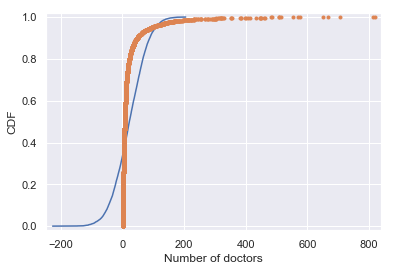

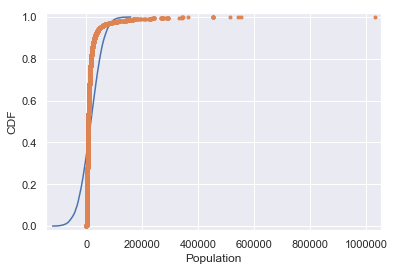

In [48]:
#Checking the normality of data
# Number of Doctors
mean1=np.mean(Population_Doctors_by_zipcode.Doctors_number)
std1=np.std(Population_Doctors_by_zipcode.Doctors_number)
samples1=np.random.normal(mean1,std1,size=10000)

x1,y1=ecdf(Population_Doctors_by_zipcode.Doctors_number)
x_theor1,y_theor1=ecdf(samples1)

sns.set()
_=plt.plot(x_theor1,y_theor1)
_=plt.plot(x1,y1,marker='.',linestyle='none')
plt.margins(0.02)
_=plt.xlabel('Number of doctors')
_=plt.ylabel('CDF')
plt.show()

# Population
mean2=np.mean(Population_Doctors_by_zipcode.Population_Zipcode)
std2=np.std(Population_Doctors_by_zipcode.Population_Zipcode)
samples2=np.random.normal(mean2,std2,size=10000)

x2,y2=ecdf(Population_Doctors_by_zipcode.Population_Zipcode)
x_theor2,y_theor2=ecdf(samples2)

sns.set()
_=plt.plot(x_theor2,y_theor2)
_=plt.plot(x2,y2,marker='.',linestyle='none')
plt.margins(0.02)
_=plt.xlabel('Population')
_=plt.ylabel('CDF')
plt.show()

[]

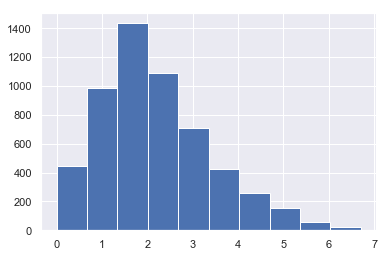

In [49]:
sns.set()
plt.hist(np.log(Population_Doctors_by_zipcode.Doctors_number))
plt.plot()

Null Hypothesis: the two variables Number of Doctors and Population are completely uncorrelated 

In [50]:
# Pearson corrélation between the number of doctor and the population
X=Population_Doctors_by_zipcode.Population_Zipcode.values
Y=Population_Doctors_by_zipcode.Doctors_number.values

# Hypothesis test on Pearson correlation 
def pearson_r(X, Y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat=np.corrcoef(X,Y)
    return corr_mat[0,1]

# Compute observed correlation
r_obs = pearson_r(X,Y)

print('Observed significance value =',r_obs)

Observed significance value = 0.6545014106932538


In [51]:
# Permutation replicates
perm_replicates = np.empty(10000)
for i in range(10000):
    x_permuted = np.random.permutation(X)
    perm_replicates[i] = pearson_r(x_permuted,Y)
# Compute p_value
p = np.sum(np.abs(perm_replicates)>=np.abs(r_obs))/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


The p_value is very low, so we reject the null hypothesis. There is a significant correlation between the number of Doctors and the Population. There is a higher Number of Doctors for the more populated territories. 

## Machine Learning

### Dataset

In [52]:
# Making new datasets
df1=data_merge.groupby(['Code Postal','Population_Zipcode','SurfaceArea_Zipcode','North_South',
                        'Latitude','Longitude','poverty_rate','unemployment_rate'])[['Profession']].count()
df1=df1.reset_index()
df1.columns=['Code Postal','Population_Zipcode','SurfaceArea_Zipcode','North_South','Latitude_from_Paris',
             'Longitude_from_Paris','poverty_rate','unemployment_rate','Doctor_Number']

In [53]:
# Male and Female number
df2=data_merge[data_merge.Civilité=='Femme'].groupby(['Code Postal'])[['Profession']].count()
df2=df2.reset_index()
df2.columns=['Code Postal','Women_doctor_rate']
df3=data_merge[data_merge.Civilité=='Homme'].groupby(['Code Postal'])[['Profession']].count()
df3=df3.reset_index()
df3.columns=['Code Postal','Men_doctor_rate']
df4=df2.merge(df3,how='outer')
df5=df1.merge(df4)
# Replace NaN by zero
df5['Women_doctor_rate'] = df5['Women_doctor_rate'].replace(np.nan, 0)
df5['Men_doctor_rate'] = df5['Men_doctor_rate'].replace(np.nan, 0)

In [54]:
# General practitioner, Dental surgeon and Specialist doctor number
df6=data_merge[data_merge.Profession=='Médecin généraliste'].groupby(['Code Postal'])[['Profession']].count()
df6=df6.reset_index()
df6.columns=['Code Postal','General_practitioner_rate']
df7=data_merge[data_merge.Profession=='Chirurgien-dentiste'].groupby(['Code Postal'])[['Profession']].count()
df7=df7.reset_index()
df7.columns=['Code Postal','Dental_surgeon_rate']
df8=df6.merge(df7,how='outer')
df9=data_merge[(data_merge.Profession!='Médecin généraliste')&(data_merge.Profession!='Chirurgien-dentiste')].groupby(['Code Postal'])[['Profession']].count()
df9=df9.reset_index()
df9.columns=['Code Postal','Specialist_doctor_rate']
df10=df8.merge(df9,how='outer')
df=df5.merge(df10)
# Replace NaN by zero
df['General_practitioner_rate']=df['General_practitioner_rate'].replace(np.nan, 0)
df['Dental_surgeon_rate']=df['Dental_surgeon_rate'].replace(np.nan, 0)
df['Specialist_doctor_rate']=df['Specialist_doctor_rate'].replace(np.nan, 0)
df=df.drop('Code Postal',axis=1)

In [55]:
# Convert Numbers into Percent
df.Women_doctor_rate=df.Women_doctor_rate/df.Doctor_Number*100
df.Men_doctor_rate=df.Men_doctor_rate/df.Doctor_Number*100
df.General_practitioner_rate=df.General_practitioner_rate/df.Doctor_Number*100
df.Dental_surgeon_rate=df.Dental_surgeon_rate/df.Doctor_Number*100
df.Specialist_doctor_rate=df.Specialist_doctor_rate/df.Doctor_Number*100
df.poverty_rate=df.poverty_rate*100

In [56]:
# Distance Latitude & Longitude from Paris
lat_paris=48.856614
long_paris=2.3522219
df.Latitude_from_Paris=df.Latitude_from_Paris-lat_paris
df.Longitude_from_Paris=df.Longitude_from_Paris-long_paris

In [57]:
# Convert object columns 
df.North_South[df.North_South=='South']=1
df.North_South[df.North_South=='North']=0
print('shape of dataset =',df.shape)
df.head()

shape of dataset = (5592, 13)


C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Population_Zipcode,SurfaceArea_Zipcode,North_South,Latitude_from_Paris,Longitude_from_Paris,poverty_rate,unemployment_rate,Doctor_Number,Women_doctor_rate,Men_doctor_rate,General_practitioner_rate,Dental_surgeon_rate,Specialist_doctor_rate
0,85846.0,6059.0,1,-2.645213,2.832086,19.954023,6.955504,168,33.928571,66.071429,25.000000,20.833333,54.166667
1,11799.0,6830.0,1,-2.783166,2.459876,19.954023,6.955504,5,0.000000,100.000000,60.000000,40.000000,0.000000
2,78444.0,17688.0,1,-2.618174,3.283416,19.954023,6.955504,43,32.558140,67.441860,41.860465,25.581395,32.558140
3,7082.0,20066.0,1,-2.837074,3.247547,19.954023,6.955504,10,20.000000,80.000000,50.000000,30.000000,20.000000
4,32233.0,17390.0,1,-3.034527,2.707461,19.954023,6.955504,17,35.294118,64.705882,58.823529,35.294118,5.882353


## Predict the number of doctors by zip code

### Statsmodels

In [58]:
import statsmodels.formula.api as smf
results = smf.ols('Doctor_Number ~ SurfaceArea_Zipcode + Population_Zipcode + North_South + Latitude_from_Paris + Longitude_from_Paris + poverty_rate + unemployment_rate + Men_doctor_rate + General_practitioner_rate + Dental_surgeon_rate', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Doctor_Number   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     685.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:45:43   Log-Likelihood:                -27751.
No. Observations:                5592   AIC:                         5.552e+04
Df Residuals:                    5581   BIC:                         5.560e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [59]:
# Univariate model to explore the SurfaceArea_Zipcode coefficient
results_SurfaceArea = smf.ols('Doctor_Number ~ SurfaceArea_Zipcode', data=df).fit()
print(results_SurfaceArea.summary())

                            OLS Regression Results                            
Dep. Variable:          Doctor_Number   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     35.76
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.37e-09
Time:                        17:45:44   Log-Likelihood:                -29973.
No. Observations:                5592   AIC:                         5.995e+04
Df Residuals:                    5590   BIC:                         5.996e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              25.9035    

### Correlation Matrix

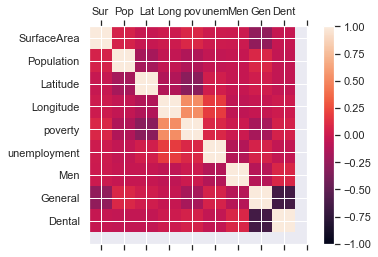

In [60]:
data=df.drop(['Doctor_Number','Men_doctor_rate','Specialist_doctor_rate'],axis=1)
names=['SurfaceArea','Population','Latitude','Longitude',
       'poverty','unemployment','Men','General','Dental']
Names=['Sur','Pop','Lat','Long',
       'pov','unem','Men','Gen','Dent']
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(Names)
ax.set_yticklabels(names)
plt.show()

In [61]:
data=df.drop(['Doctor_Number','Men_doctor_rate','Specialist_doctor_rate'],axis=1)
data.columns=['Surface','Population','North_South','Latitude','Longitude','poverty','unemploy','Women','General','Dental']
correlations = data.corr()
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,Surface,Population,Latitude,Longitude,poverty,unemploy,Women,General,Dental
Surface,1,0.058,-0.02,0.014,0.088,0.011,0.0061,-0.27,-0.031
Population,0.058,1,-0.17,-0.04,-0.13,-0.042,-0.024,0.09,-0.046
Latitude,-0.02,-0.17,1,-0.12,-0.3,0.038,-0.027,0.031,-0.046
Longitude,0.014,-0.04,-0.12,1,0.52,0.18,-0.061,-0.03,0.015
poverty,0.088,-0.13,-0.3,0.52,1,0.092,0.0067,-0.17,0.051
unemploy,0.011,-0.042,0.038,0.18,0.092,1,-0.12,0.061,-0.039
Women,0.0061,-0.024,-0.027,-0.061,0.0067,-0.12,1,-0.095,0.083
General,-0.27,0.09,0.031,-0.03,-0.17,0.061,-0.095,1,-0.65
Dental,-0.031,-0.046,-0.046,0.015,0.051,-0.039,0.083,-0.65,1


### RandomForestRegressor with all the features

In [62]:
# Import module
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [63]:
df = shuffle(df)
X1=df.drop(['Doctor_Number','Men_doctor_rate','Specialist_doctor_rate'],axis=1)
y1=df.Doctor_Number

In [64]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.3,random_state=21)

In [65]:
param={'max_depth':[2,4,6,8,10]}
regr1=RandomForestRegressor()
regr_cv1=GridSearchCV(regr1,param,cv=5)
regr_cv1.fit(X_train1,y_train1)
print(regr_cv1.best_params_)
print(regr_cv1.best_score_)

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

{'max_depth': 10}
0.7558535499142552


In [66]:
regr_1 = RandomForestRegressor(random_state=21,max_depth=6)
regr_1.fit(X_train1, y_train1) 
print('R² Score train data =',regr_1.score(X_train1,y_train1))
print('R² Score test data =',regr_1.score(X_test1,y_test1))

R² Score train data = 0.8965504316176269
R² Score test data = 0.7929502129307675


C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
feature_importances = pd.DataFrame(regr_1.feature_importances_,index = X_train1.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Population_Zipcode,0.660733
General_practitioner_rate,0.213660
Dental_surgeon_rate,0.049842
SurfaceArea_Zipcode,0.024919
Women_doctor_rate,0.024367
Latitude_from_Paris,0.009109
Longitude_from_Paris,0.007127
unemployment_rate,0.006323
North_South,0.002168
poverty_rate,0.001751


### Random Forest Regressor without 'Men/Women', 'poverty_rate', 'Longitude' & 'North_South'

In [68]:
X2=df.drop(['Doctor_Number','Men_doctor_rate','Specialist_doctor_rate','North_South','Longitude_from_Paris'],axis=1)
y2=df.Doctor_Number

In [69]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3,random_state=21)

In [70]:
param={'max_depth':[2,4,6,8,10]}
regr2=RandomForestRegressor()
regr_cv2=GridSearchCV(regr2,param,cv=5)
regr_cv2.fit(X_train2,y_train2)
print(regr_cv2.best_params_)
print(regr_cv2.best_score_)

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

{'max_depth': 8}
0.7719136799637999


C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [71]:
regr_2 = RandomForestRegressor(random_state=21,max_depth=8)
regr_2.fit(X_train2, y_train2) 
print('R² Score train data =',regr_2.score(X_train2,y_train2))
print('R² Score test data =',regr_2.score(X_test2,y_test2))

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R² Score train data = 0.9298724373009899
R² Score test data = 0.7789195320430169


In [72]:
feature_importances = pd.DataFrame(regr_2.feature_importances_,index = X_train2.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Population_Zipcode,0.639489
General_practitioner_rate,0.209934
Dental_surgeon_rate,0.054199
SurfaceArea_Zipcode,0.038221
Women_doctor_rate,0.025496
Latitude_from_Paris,0.019296
unemployment_rate,0.007807
poverty_rate,0.005556


## Predict the population by General Practitioner (by zip code)

### Dataset

In [80]:
df['Population_by_Number_Doctor']=df.Population_Zipcode/df.Doctor_Number*df.General_practitioner_rate
df = shuffle(df)
X3=df.drop(['Doctor_Number','Men_doctor_rate','Specialist_doctor_rate','General_practitioner_rate',
            'Dental_surgeon_rate','Population_by_Number_Doctor','Doctor_Number'],axis=1)
y3=df['Population_by_Number_Doctor']

### Statsmodels

In [74]:
results3 = smf.ols('Population_by_Number_Doctor ~ Population_Zipcode + SurfaceArea_Zipcode +  North_South + Latitude_from_Paris + Longitude_from_Paris + poverty_rate + unemployment_rate + Men_doctor_rate + Doctor_Number', data=df).fit()
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:     Population_by_Number_Doctor   R-squared:                       0.114
Model:                                     OLS   Adj. R-squared:                  0.113
Method:                          Least Squares   F-statistic:                     80.13
Date:                         Sun, 25 Aug 2019   Prob (F-statistic):          2.65e-140
Time:                                 17:45:53   Log-Likelihood:                -73371.
No. Observations:                         5592   AIC:                         1.468e+05
Df Residuals:                             5582   BIC:                         1.468e+05
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### RandomForestRegressor with all the features

In [81]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y3,test_size=0.3,random_state=21)

In [82]:
param={'max_depth':[2,4,6,8,10]}
regr3=RandomForestRegressor()
regr_cv3=GridSearchCV(regr3,param,cv=5)
regr_cv3.fit(X_train3,y_train3)
print(regr_cv3.best_params_)
print(regr_cv3.best_score_)

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

{'max_depth': 6}
0.1972183410422702


C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
regr_3 = RandomForestRegressor(random_state=21,max_depth=6)
regr_3.fit(X_train3, y_train3) 
print('R² Score train data =',regr_3.score(X_train3,y_train3))
print('R² Score test data =',regr_3.score(X_test3,y_test3))

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R² Score train data = 0.6952071891919325
R² Score test data = 0.26970307164719687


In [84]:
feature_importances3 = pd.DataFrame(regr_3.feature_importances_,index = X_train3.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances3

,importance
Women_doctor_rate,0.491290
Population_Zipcode,0.359225
SurfaceArea_Zipcode,0.054524
Latitude_from_Paris,0.045666
Longitude_from_Paris,0.023677
unemployment_rate,0.013145
poverty_rate,0.012442
North_South,0.000031
